=== Clonal Selection Algorithm Theoretical Output ===

Generation 01:
  ▶ Best Antibody: [-1.25927804 -1.42008127]
  ▶ Best Fitness : 3.6024
  ▶ Avg Fitness  : 20.0625

Generation 02:
  ▶ Best Antibody: [-0.98222989 -1.3137426 ]
  ▶ Best Fitness : 2.6907
  ▶ Avg Fitness  : 7.3877

Generation 03:
  ▶ Best Antibody: [-0.73005459 -1.3816577 ]
  ▶ Best Fitness : 2.4420
  ▶ Avg Fitness  : 3.0927

Generation 04:
  ▶ Best Antibody: [-0.34210074 -0.78758289]
  ▶ Best Fitness : 0.7373
  ▶ Avg Fitness  : 2.0525

Generation 05:
  ▶ Best Antibody: [-0.38660462 -0.5098814 ]
  ▶ Best Fitness : 0.4094
  ▶ Avg Fitness  : 1.0400

Generation 06:
  ▶ Best Antibody: [-0.2616251  -0.32747709]
  ▶ Best Fitness : 0.1757
  ▶ Avg Fitness  : 0.3872

Generation 07:
  ▶ Best Antibody: [-0.1203262  -0.05457391]
  ▶ Best Fitness : 0.0175
  ▶ Avg Fitness  : 0.1350

Generation 08:
  ▶ Best Antibody: [-0.02134226 -0.04933466]
  ▶ Best Fitness : 0.0029
  ▶ Avg Fitness  : 0.0259

Generation 09:
  ▶ Best Antibody: [ 0.00

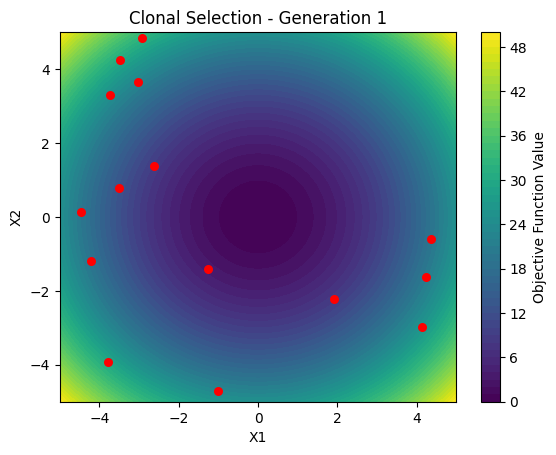

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Objective function (we want to minimize this)
def objective_function(x):
    return x[0]**2 + x[1]**2  # Simple paraboloid

# Generate a random antibody (solution)
def random_antibody(bounds):
    return np.random.uniform(bounds[0], bounds[1], 2)

# Mutate an antibody (small change)
def mutate(antibody, mutation_rate, bounds):
    mutation = antibody + np.random.normal(0, mutation_rate, size=2)
    return np.clip(mutation, bounds[0], bounds[1])

# Main Clonal Selection Algorithm with theoretical outputs
def clonal_selection(objective_function, bounds, n_population=20, n_generations=50, n_clones=5, mutation_rate=0.1):

    population = [random_antibody(bounds) for _ in range(n_population)]
    history = []

    print("=== Clonal Selection Algorithm Theoretical Output ===\n")

    for gen in range(n_generations):
        fitness = np.array([objective_function(p) for p in population])
        sorted_indices = np.argsort(fitness)
        population = [population[i] for i in sorted_indices]
        best = population[0]
        best_fitness = fitness[sorted_indices[0]]
        avg_fitness = np.mean(fitness)

        # Print theoretical output
        print(f"Generation {gen+1:02d}:")
        print(f"  ▶ Best Antibody: {best}")
        print(f"  ▶ Best Fitness : {best_fitness:.4f}")
        print(f"  ▶ Avg Fitness  : {avg_fitness:.4f}\n")

        history.append(population)

        # Clone and mutate
        new_population = []
        for i in range(n_population):
            for _ in range(n_clones):
                clone = mutate(population[i], mutation_rate, bounds)
                new_population.append(clone)

        new_fitness = np.array([objective_function(p) for p in new_population])
        best_indices = np.argsort(new_fitness)[:n_population]
        population = [new_population[i] for i in best_indices]

    return history

# Animation function
def animate_clonal_selection(history, bounds):
    fig, ax = plt.subplots()
    x = np.linspace(bounds[0], bounds[1], 100)
    y = np.linspace(bounds[0], bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function([X, Y])
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    scat = ax.scatter([], [], c='red', s=30)

    # Add color bar and labels
    cbar = fig.colorbar(contour, ax=ax)
    cbar.set_label("Objective Function Value")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

    def update(frame):
        data = np.array(history[frame])
        scat.set_offsets(data)
        ax.set_title(f"Clonal Selection - Generation {frame + 1}")
        return scat,

    ani = animation.FuncAnimation(fig, update, frames=len(history), interval=300, blit=True)
    plt.show()

# Parameters
bounds = [-5, 5]
history = clonal_selection(objective_function, bounds, n_population=15, n_generations=50, n_clones=5, mutation_rate=0.2)
animate_clonal_selection(history, bounds)
